# Modern Portfolio Theory

Let us consider a portfolio  

One of the assumptions in financial modelling is that the return($R$) of a security is a random variable. The standard deviation of the return is considered to be a measure of risk. The relationship between the log return and the simple return is $r_t= log(1+R_t)$ or $R_t=e^{r_t}-1$. Log returns are more useful becuase of the additivity of risks. Lets examine this below.  
* For mutliperiod ($k$ periods) returns,  $r_t[k]=r_t + r_{t-1} + \ldots + r_{t-k+1}$.
* $Var(r_t[k]) = Var(r_t) + Var(r_{t-1}) + \ldots + Var(r_{t-k+1})$. This holds true only when $r_i$ are independent.

The expectation value of the return is $\mu = E (R)$. The standard deviation of the return($\sigma$) is considered to be a measure of risk. The return and the standard deviation have the same units.



### Some rules on random variables:
For example, consider random variables $X$,$Y$  
* $E(X+Y)= E(X)+E(Y)$
* Say $E(X)=\mu_X$, $Var(X)= E[(X_i-\mu_X)^2] = E(X^2)-\mu_X^2$
* $Var(aX)=a^2Var(X)$
* $Cov(X,Y)=E[(X-\mu_X)(Y-\mu_Y)]=E(XY)-E(X)E(Y)$
* $Var(X+Y)=Var(X)+2Cov(X,Y)+Var(Y)$
* If $X$ and $Y$ are independent, $Cov(X,Y)=0$
* Correlation = $\frac{Cov(X,Y)}{\sqrt{Var(X)Var(Y)}}$ , $-1 \le Correlation \le 1$

### Portfolio with only two securities
* Consider two securities $S_1$ and $S_2$, and their expected returns $r_1$ and $r_2$ respectively.
* The initial value of the portfolio $V(0)=$


Question: How to find optimum weights



In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Constants
data_folder='data_2020_09_25'
variable='Adj Close'
start_date = '2010-09-25'
end_date = '2020-09-25'
n_stocks=len(os.listdir(data_folder))

In [3]:
def get_stocks_data_from_folder(data_folder, variable, start_date, end_date):
    files_list=os.listdir(data_folder)
    df=pd.DataFrame()
    for filename in files_list:
        file_path=os.path.join(data_folder,filename)
        col_name=filename.replace('.NS.csv','')
        df[col_name]=read_stock_variable_from_CSV(file_path,variable,start_date, end_date)[variable]

    return df

def read_stock_variable_from_CSV(file_path,variable,start_date, end_date):
    data=pd.read_csv(file_path)
    data['Date'] = data['Date'].apply(pd.to_datetime)
    data.set_index('Date',inplace=True)
    mask = (data.index >= start_date) & (data.index <= end_date)
    return data.loc[mask][['Adj Close']]

 Adjusted closing is closing price but it includes stock splitting, dividends, etc.

In [4]:
data_adj_close=get_stocks_data_from_folder(data_folder, 'Adj Close', start_date, end_date)

In [5]:
missing_values_count = data_adj_close.isnull().sum()
print(missing_values_count)
data_adj_close.dropna(inplace=True)

AXISBANK     8
DABUR        8
DRREDDY      8
ICICIBANK    8
INFY         8
RELIANCE     8
SBIN         8
SUNPHARMA    8
TCS          8
dtype: int64


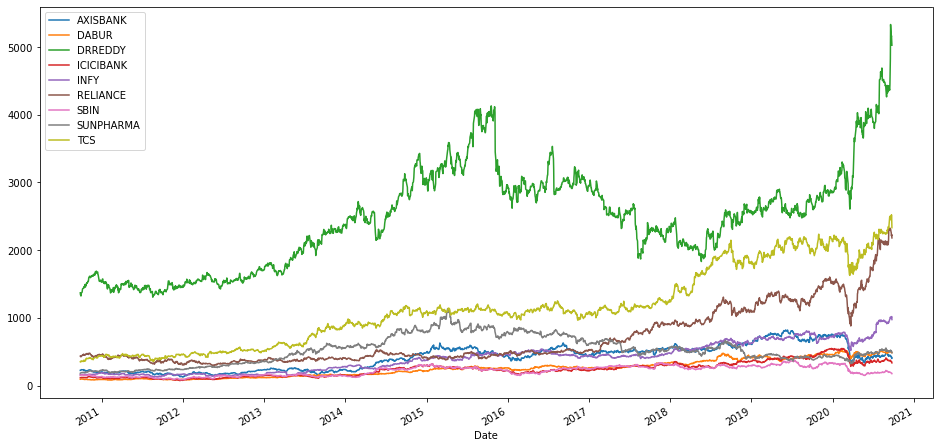

In [6]:
data_adj_close.plot(figsize=(16,8))

In [7]:
daily_returns= data_adj_close.pct_change(1)
daily_returns.dropna(inplace=True)
daily_logreturns=np.log(1+daily_returns)

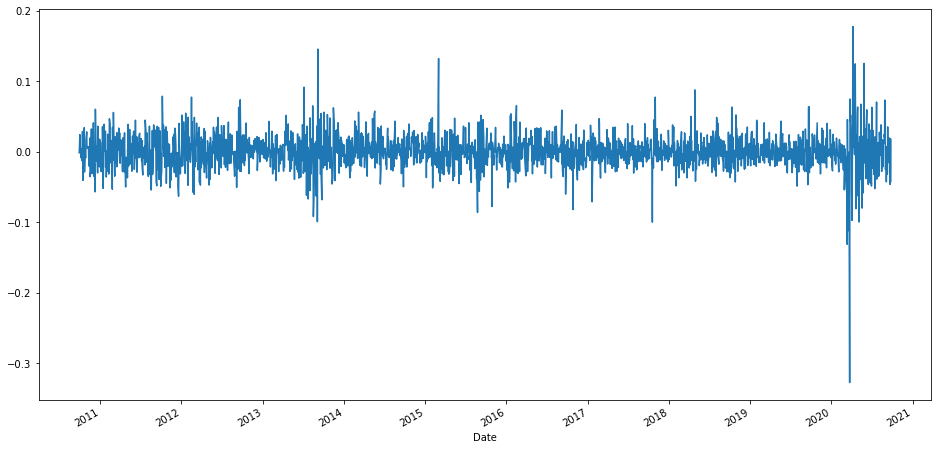

In [8]:
daily_logreturns['AXISBANK'].plot(figsize=(16,8))

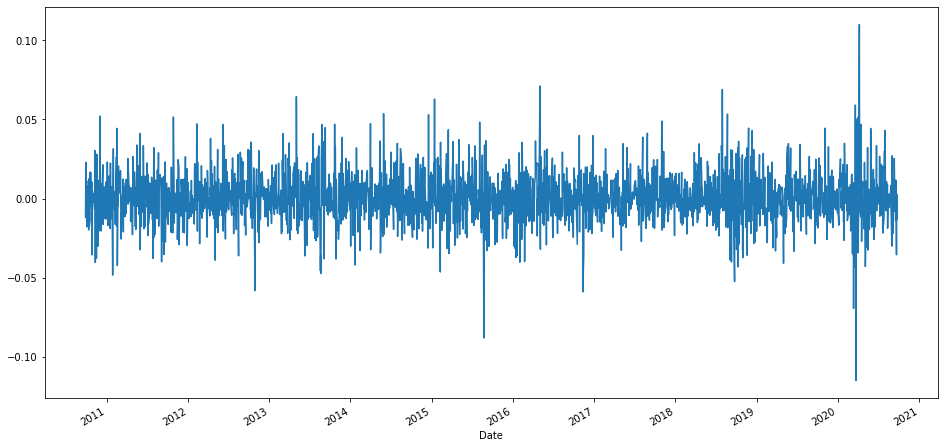

In [9]:
daily_logreturns['DABUR'].plot(figsize=(16,8))

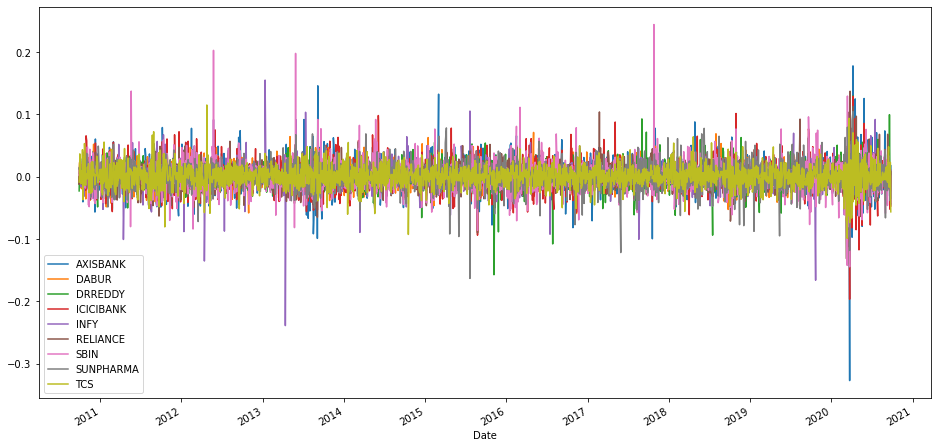

In [84]:
daily_logreturns.plot(figsize=(16,8))

C:\Users\bharath\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BC3D1DBA88>,
      dtype=object)

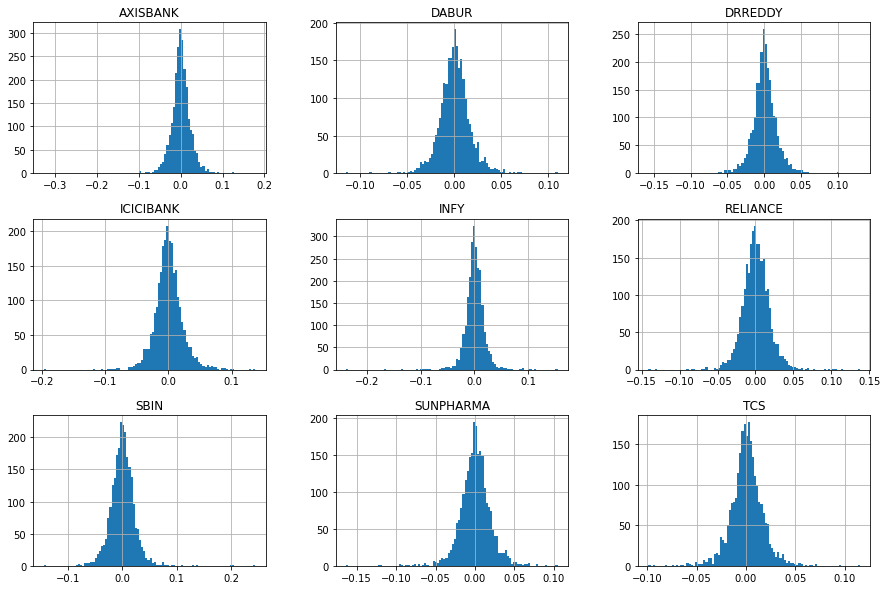

In [65]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
daily_logreturns.hist(ax = ax,bins=100)

In [66]:
daily_logreturns.mean()*252 # per year

AXISBANK     0.059558
DABUR        0.168364
DRREDDY      0.133080
ICICIBANK    0.107442
INFY         0.184585
RELIANCE     0.164989
SBIN         0.014902
SUNPHARMA    0.100159
TCS          0.193752
dtype: float64

In [67]:
daily_logreturns.cov()*252 # per year

,AXISBANK,DABUR,DRREDDY,ICICIBANK,INFY,RELIANCE,SBIN,SUNPHARMA,TCS
AXISBANK,0.141409,0.021379,0.016119,0.089238,0.024425,0.044105,0.078906,0.024168,0.019113
DABUR,0.021379,0.062896,0.013134,0.020514,0.011607,0.017356,0.017525,0.018457,0.009857
DRREDDY,0.016119,0.013134,0.073095,0.017746,0.012130,0.017910,0.015571,0.029341,0.009489
ICICIBANK,0.089238,0.020514,0.017746,0.121848,0.023538,0.043791,0.082593,0.023135,0.019609
INFY,0.024425,0.011607,0.012130,0.023538,0.086523,0.019029,0.019187,0.013533,0.037829
RELIANCE,0.044105,0.017356,0.017910,0.043791,0.019029,0.083581,0.041127,0.022409,0.019561
SBIN,0.078906,0.017525,0.015571,0.082593,0.019187,0.041127,0.133870,0.019984,0.014061
SUNPHARMA,0.024168,0.018457,0.029341,0.023135,0.013533,0.022409,0.019984,0.094950,0.012304
TCS,0.019113,0.009857,0.009489,0.019609,0.037829,0.019561,0.014061,0.012304,0.067860


In [68]:
def get_portfolio_return(weights, daily_logreturns):
    return np.sum(daily_logreturns.mean()*weights)*252 # per year - 252 trading days

In [69]:
def get_portfolio_variance(weights, daily_logreturns):
    return np.sqrt(np.dot(weights.T, np.dot(daily_logreturns.cov()*252,weights)))

In [70]:
def generate_porfolios_stats_randomly(daily_logreturns, n_portfolios):
    n_stocks=len(daily_logreturns.columns)
    pf_returns=[]
    pf_variances=[]
    
    for i in range(n_portfolios):
        weights=np.random.random(n_stocks)
        weights /= np.sum(weights)
        pf_returns.append(get_portfolio_return(weights, daily_logreturns))
        pf_variances.append(get_portfolio_variance(weights, daily_logreturns))
    
    pf_returns=np.array(pf_returns)
    pf_variances=np.array(pf_variances)
    return pf_returns, pf_variances

In [71]:
returns, variances = generate_porfolios_stats_randomly(daily_logreturns, 10000)

In [72]:
def plot_portfolios(pfreturns,pfvariances):
    plt.figure(figsize = (15,8))
    plt.scatter(pfvariances, pfreturns,c=pfreturns/pfvariances, marker='o' , edgecolor='black')
    plt.grid(True)
    plt.xlabel('Expected Variance')
    plt.ylabel('Expected Return')
    plt.colorbar(label= 'Sharp Ratio')
    plt.show()

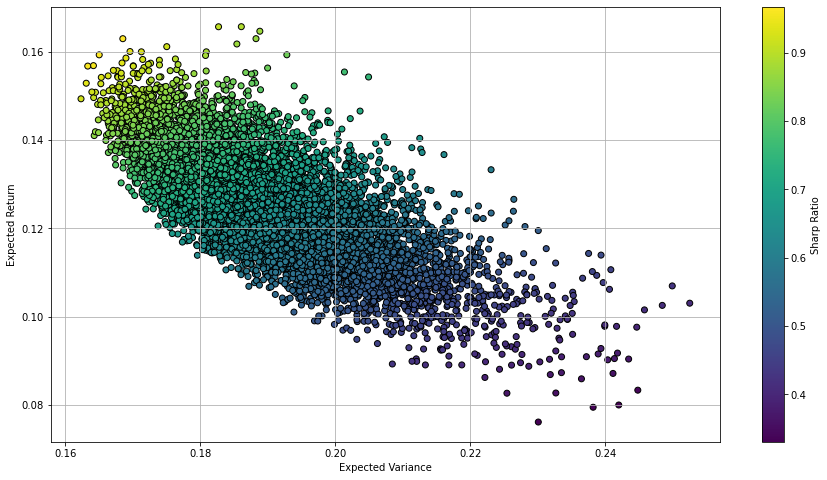

In [73]:
plot_portfolios(returns,variances)

In [74]:
def get_portfolio_stats(weights, daily_logreturns):
    pf_return=get_portfolio_return(weights, daily_logreturns)
    pf_variance=get_portfolio_variance(weights, daily_logreturns)
    return np.array([pf_return, pf_variance, pf_return/pf_variance])

In [78]:
def get_portfolio_sharp_ration(weights, daily_logreturns):
    return -get_portfolio_stats(weights, daily_logreturns)[2]

In [76]:
from scipy.optimize import minimize
def optimize_portfolio(daily_logreturns):
    n_stocks=len(daily_logreturns.columns)
    bounds = tuple((0,1) for x in range(n_stocks))
    con=({'type':'eq','fun': lambda x: np.sum(x)-1})
    weights=np.random.random(n_stocks)
    weights /= np.sum(weights)
    optimum_pf=minimize(fun=get_portfolio_sharp_ration, x0=weights, args=daily_logreturns, bounds=bounds, method='SLSQP', constraints=con)
    return optimum_pf

In [79]:
opt_pf=optimize_portfolio(daily_logreturns)
print('Optimal weights:',opt_pf['x'].round(3))

Optimal weights: [0.    0.299 0.152 0.    0.131 0.129 0.    0.    0.29 ]


In [ ]:
AXISBANK 	DABUR 	DRREDDY 	ICICIBANK 	INFY 	RELIANCE 	SBIN 	SUNPHARMA 	TCS

In [80]:
# optimum portfolio statistics
opt_pf_stats=get_portfolio_stats(opt_pf['x'],daily_logreturns)
print('Expected return, Volatility and Sharp ratio:',opt_pf_stats)

Expected return, Volatility and Sharp ratio: [0.17205126 0.16731228 1.02832414]


In [81]:
def plot_optimum_portfolios(pfreturns,pfvariances):
    plt.figure(figsize = (15,8))
    plt.scatter(pfvariances, pfreturns,c=pfreturns/pfvariances, marker='o' , edgecolor='black')
    plt.plot(opt_pf_stats[1],opt_pf_stats[0],'g*', markersize=20)
    plt.grid(True)
    plt.xlabel('Expected Variance')
    plt.ylabel('Expected Return')
    plt.colorbar(label= 'Sharp Ratio')
    plt.show()

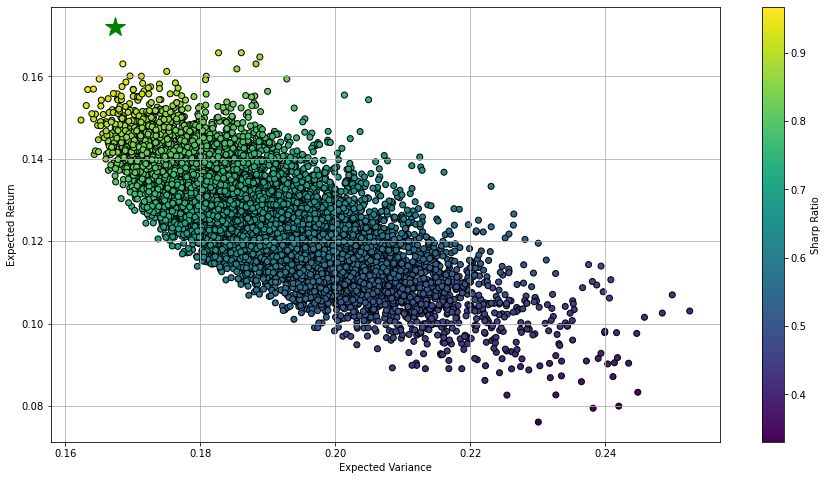

In [82]:
plot_optimum_portfolios(returns,variances)